In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80,random_state=13)

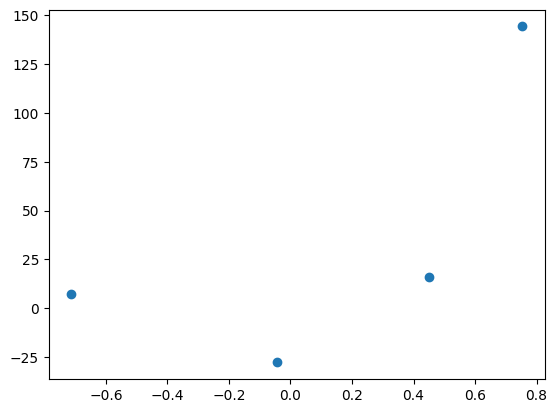

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.coef_

array([78.35063668])

In [ ]:
reg.intercept_

26.15963284313262

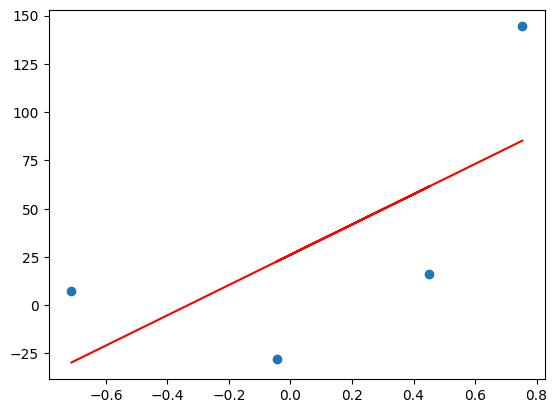

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [ ]:
# apply Gradient Descent assuming slope is constant m = 78.35
# assume the starting value for intercept b = 0

In [ ]:
y_pred = ((78.35 * X) + 0).reshape(4)

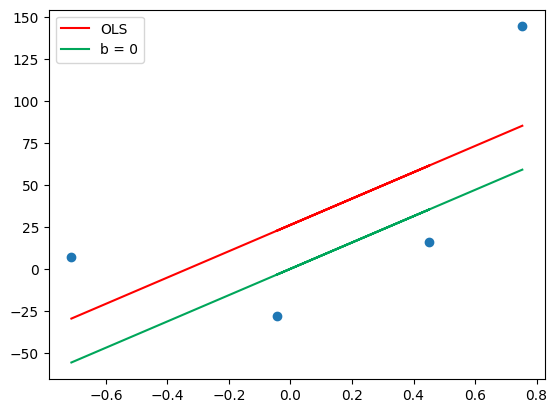

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [ ]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [ ]:
lgr = 0.1

step_size = loss_slope*lgr
step_size

-20.927763408209216

In [ ]:
b = b - step_size
b

20.927763408209216

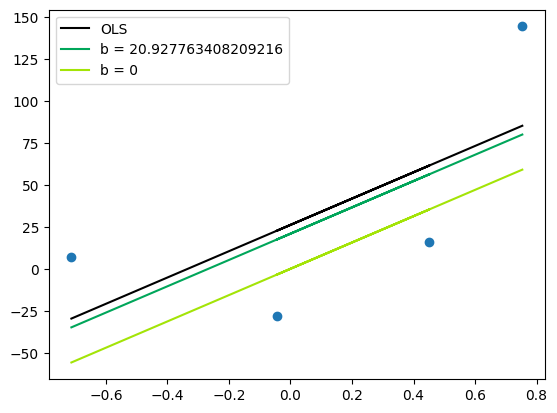

In [ ]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E407',label='b = 0')
plt.legend()
plt.show()

In [ ]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [ ]:
step_size = loss_slope*lgr
step_size

-4.185552681641844

In [ ]:
b = b - step_size
b

25.11331608985106

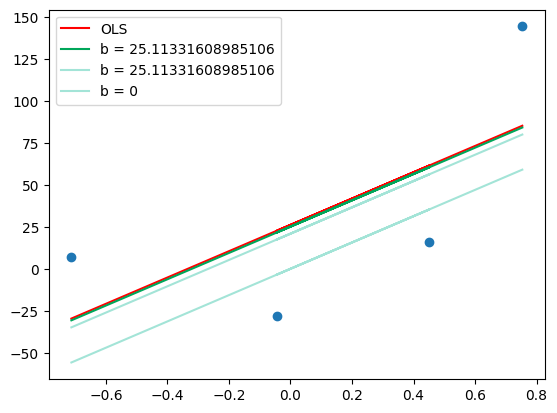

In [ ]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3e4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()

In [ ]:
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [ ]:
step_size = loss_slope*lgr
step_size

-0.8371105363283675

In [ ]:
b = b - step_size
b

25.95042662617943

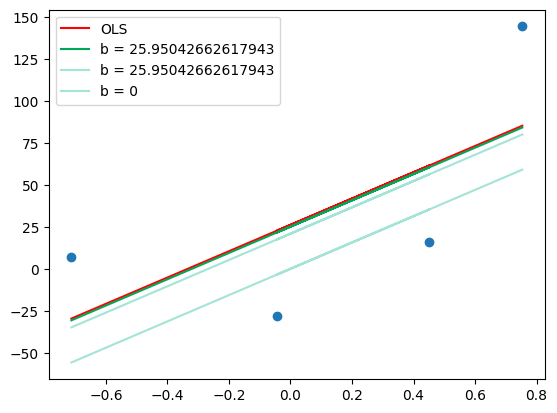

In [ ]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3e4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()

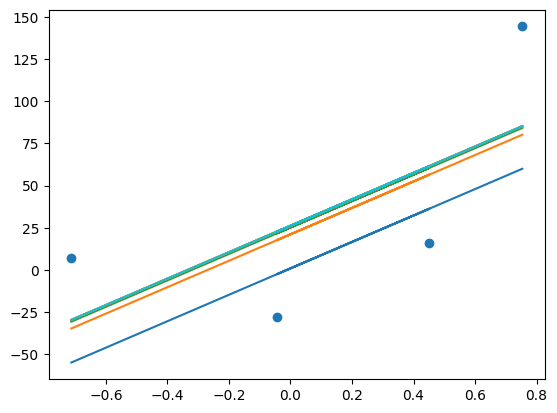

In [ ]:
b = -100
m = 78.35
lr = 0.1
epochs = 10
for i in range(epochs):
  loss_shape = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_shape)

  y_pred = m * X + b
  plt.plot(X,y_pred)

plt.scatter(X,y)

creating own class of gradient descent

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20,random_state=13)

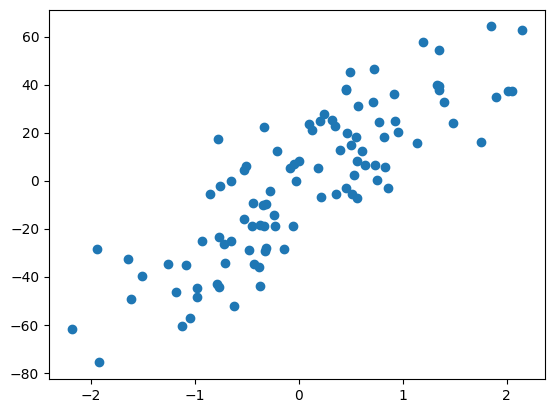

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.67684216]
-2.088699766134101


In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.71337703667083

In [ ]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    #calc b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.b,self.m)

  def predict(self,X):
    return self.m * X + self.b


In [ ]:
gd = GDRegressor(0.001,50)

In [ ]:
gd.fit(X_train,y_train)

-2.095758658639012 28.724155640527858


In [ ]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7129234154065953